# Project 9 -Partial Correlations and Directed Acyclic Graphs
## Generating artificial data 

In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [25.66309420745717,
  22.584925370341765,
  22.95294540929161,
  26.295938654685127,
  28.975944856941133,
  27.73257148621912,
  25.161527530714466,
  22.764008552557257,
  19.470850694291187,
  25.205299919147855,
  22.03471481884118,
  24.35683200363119,
  27.92937231401629,
  30.370255340548027,
  26.62971598501545,
  21.692098209173587,
  24.745286152272552,
  26.203277754304178,
  27.28323103303558,
  26.283107508966502,
  25.881490489559148,
  20.27855381697406,
  27.668327238610395,
  26.528356926757457,
  22.71559267593707,
  22.28433983617234,
  21.20158189334437,
  30.438547448501943,
  24.086955321792413,
  27.25097654154654,
  23.95498683150968,
  26.25432818371854,
  25.826520148098673,
  28.423736869162486,
  23.983729239167683,
  25.6213307785847,
  23.53060343858142,
  26.885747193932225,
  23.89370162461509,
  25.859700241758468,
  22.470650795499136,
  23.978794282634883,
  27.13458024923591,
  26.459150896957293,
  24.19492420497032,
  26.18074990582392,
  23.

In [2]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,25.663094,40.708736,115.971475,-38.529034,306.797974
1,22.584925,47.590663,149.898309,-55.586951,375.792981
2,22.952945,54.182549,160.991472,-60.106696,407.907837
3,26.295939,41.423057,120.567870,-31.366347,290.444429
4,28.975945,53.372631,172.981949,-60.079453,431.851885
...,...,...,...,...,...
99995,21.249491,57.488930,170.713851,-57.933569,413.003608
99996,27.361865,51.556526,151.707311,-52.091337,392.165235
99997,25.734506,54.515508,152.150708,-59.646453,402.588153
99998,25.608369,56.088547,170.636770,-47.587084,399.824229


<AxesSubplot:xlabel='X', ylabel='Z'>

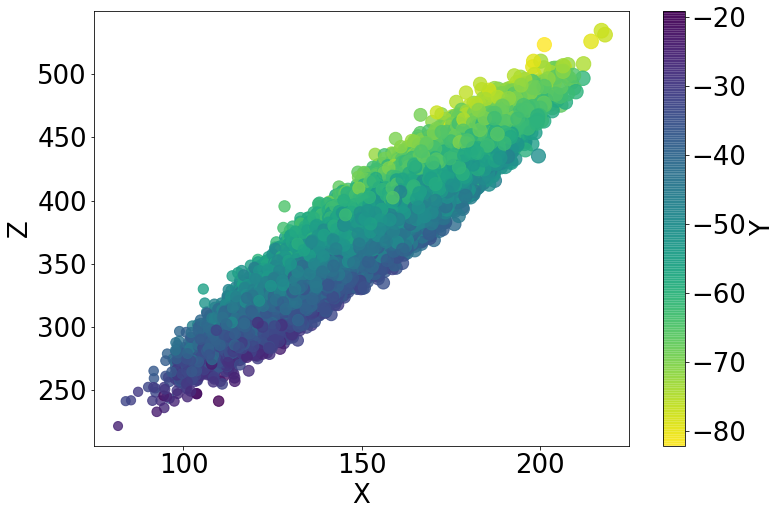

In [3]:
import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "X", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [4]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,-0.001009,0.000142,0.002927,0.139879
Q,-0.001009,1.000000,0.948146,-0.700949,0.913590
X,0.000142,0.948146,1.000000,-0.664238,0.933577
Y,0.002927,-0.700949,-0.664238,1.000000,-0.842426
Z,0.139879,0.913590,0.933577,-0.842426,1.000000


In [5]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 2.468e+04
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:00:14   Log-Likelihood:            -1.9903e+05
No. Observations:              100000   AIC:                         3.981e+05
Df Residuals:                   99995   BIC:                         3.981e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -0.0064      0.004     -1.713      0.0

                            OLS Regression Results                            
Dep. Variable:                      Z   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.217e+06
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:00:15   Log-Likelihood:            -3.0296e+05
No. Observations:              100000   AIC:                         6.059e+05
Df Residuals:                   99995   BIC:                         6.060e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
P              1.9928      0.006    314.200      0.0

In [6]:
residuals

,P,Q,X,Y,Z
0,-0.780997,1.023838,-3.972713,2.238589,4.469107
1,0.116440,-2.877248,4.682001,-3.737963,-5.351406
2,-1.097760,0.272238,-0.612624,-1.071540,0.292672
3,2.070011,1.144986,1.485878,-0.274468,-5.722189
4,3.398334,-3.789136,6.573340,-3.612678,-5.633720
...,...,...,...,...,...
99995,-1.517519,1.120940,0.143219,-0.688999,-1.474925
99996,-0.233725,0.899340,-3.561212,2.174091,5.711552
99997,-0.506636,3.058387,-5.176143,0.398104,3.568218
99998,0.927746,0.680718,1.892415,0.669884,-2.528950


In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,-0.01,-0.58,0.63,0.70
Q,-0.01,1.00,0.50,-0.13,0.01
X,-0.58,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.89
Z,0.70,0.01,0.83,-0.89,1.00


In [8]:
# !pip install pinguoin

In [9]:
import pingouin
df.pcorr().round(2)

C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,P,Q,X,Y,Z
P,1.00,-0.01,-0.58,0.63,0.70
Q,-0.01,1.00,0.50,-0.13,0.01
X,-0.58,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.89
Z,0.70,0.01,0.83,-0.89,1.00


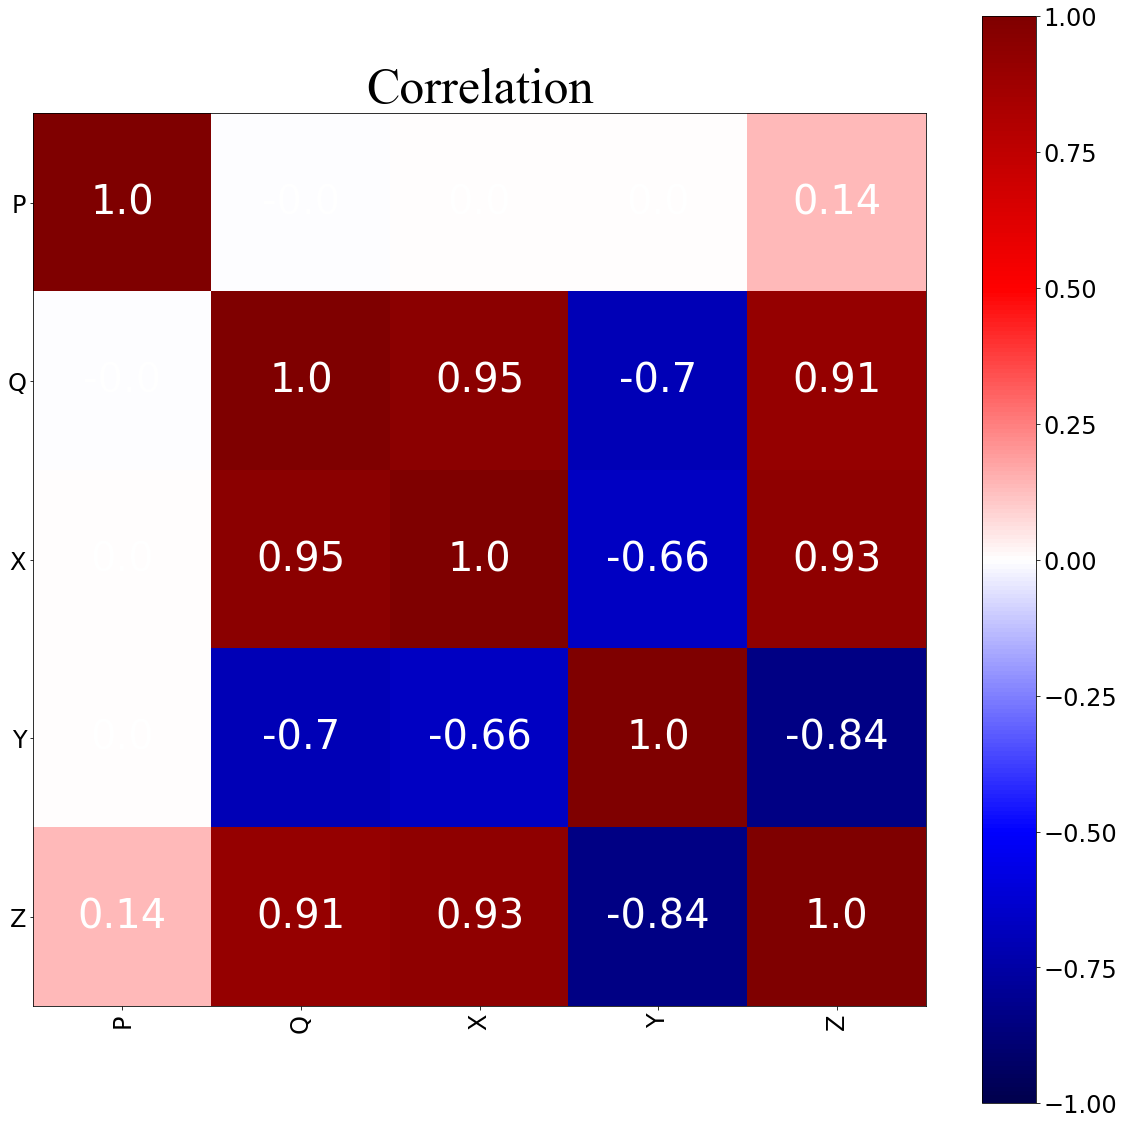

In [10]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Correlation")


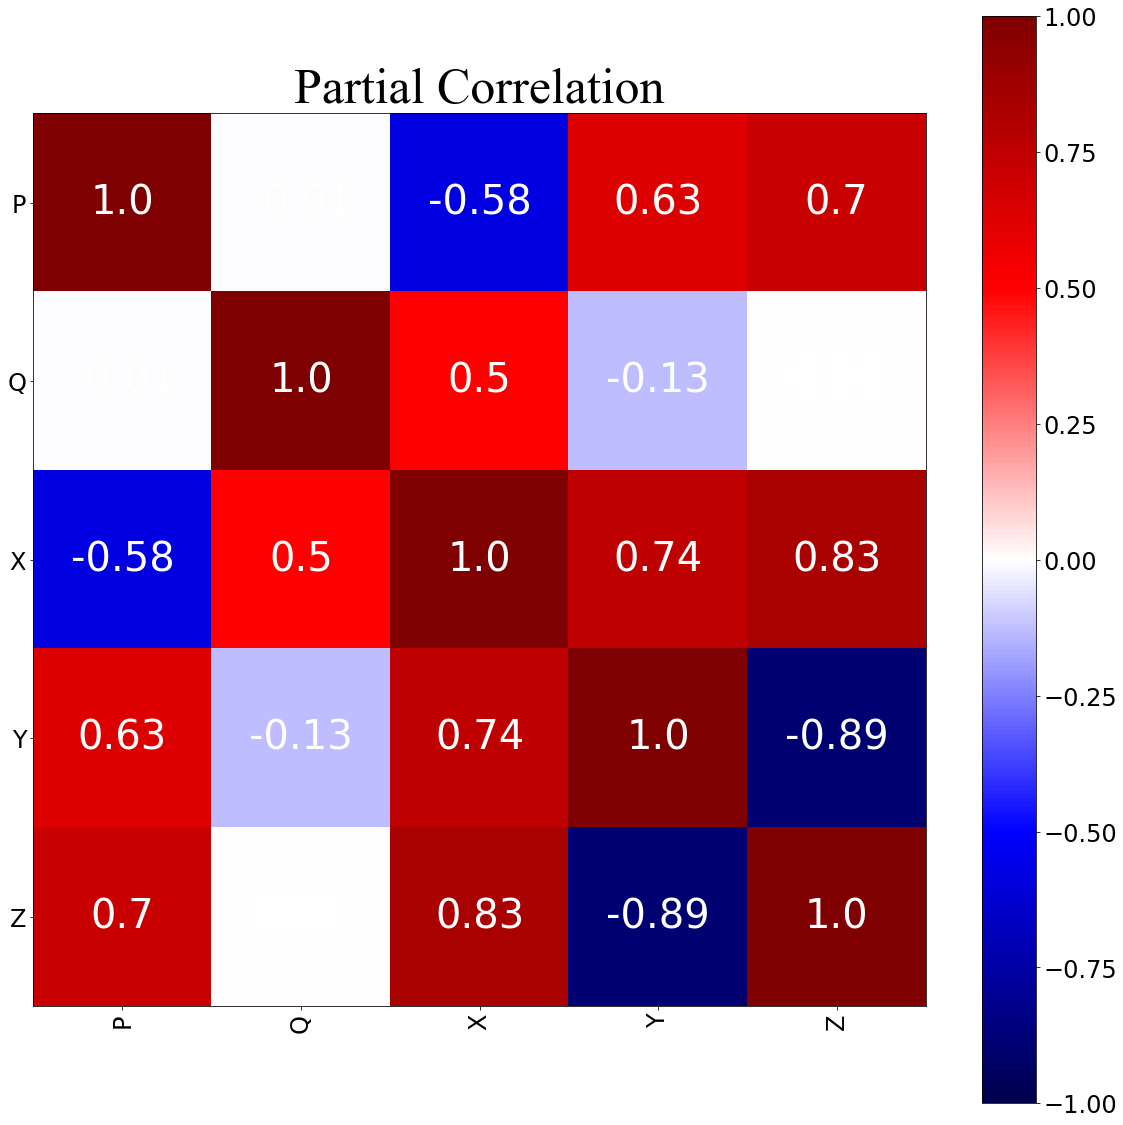

In [11]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None,
                   title = "Partial Correlation")


In [12]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # regress one residual on the other
            #  save the pvalue for the explanatory variable
            #  this is the pvalue of the partial correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              2.934
Date:                Tue, 02 Nov 2021   Prob (F-statistic):                      0.0868
Time:                        10:00:21   Log-Likelihood:                     -1.9902e+05
No. Observations:              100000   AIC:                                  3.981e+05
Df Residuals:                   99999   BIC:                                  3.981e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      Q   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              2.667
Date:                Tue, 02 Nov 2021   Prob (F-statistic):                       0.102
Time:                        10:00:21   Log-Likelihood:                     -1.8293e+05
No. Observations:              100000   AIC:                                  3.659e+05
Df Residuals:                   99999   BIC:                                  3.659e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.553
Model:                            OLS   Adj. R-squared (uncentered):              0.553
Method:                 Least Squares   F-statistic:                          1.239e+05
Date:                Tue, 02 Nov 2021   Prob (F-statistic):                        0.00
Time:                        10:00:21   Log-Likelihood:                     -1.8232e+05
No. Observations:              100000   AIC:                                  3.646e+05
Df Residuals:                   99999   BIC:                                  3.646e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.09,0.0,0.0,0.0
Q,0.09,NaN,0.0,0.0,0.1
X,0.00,0.00,NaN,0.0,0.0
Y,0.00,0.00,0.0,NaN,0.0
Z,0.00,0.10,0.0,0.0,NaN


In [13]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [14]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X', 'P']
Y Q ['X

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

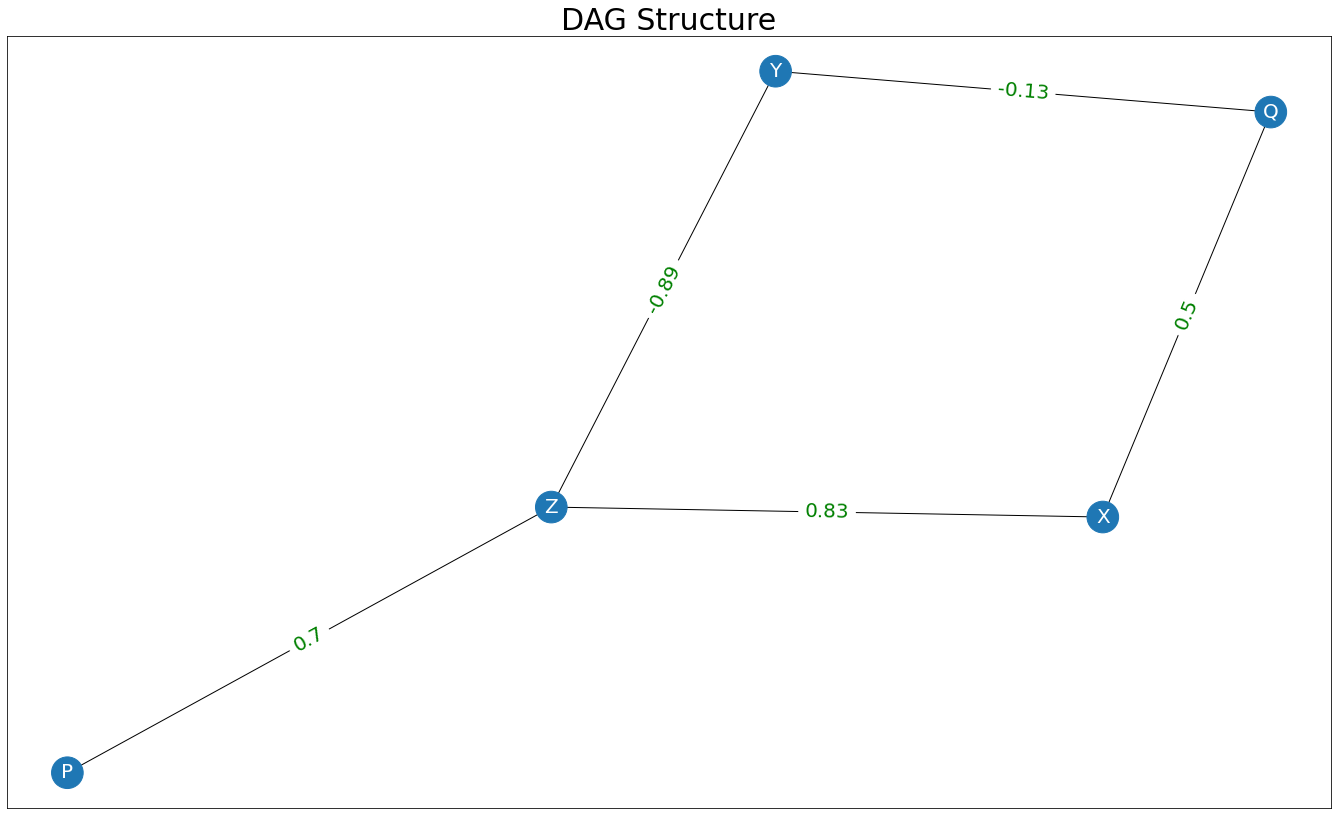

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                    # show node label
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size=20)    
    
    plt.show()
    
graph_DAG(undirected_graph, df)

In [20]:
from pgmpy.estimators import PC
c= PC(df)
max_cond_vars = len(df.keys()) - 2
model = c.estimate(return_type = "dag",
                  variant = "parallel", #"orig", "stable"
                  significance = p_val,
                  max_cond_vars = max_cond_vars,
                  ci_test = "pearsonr")
edges = model.edges()
edges

Working for n conditional variables: 3: 100%|████████████████████████████████████████████| 3/3 [00:01<00:00,  2.70it/s]C:\Users\JLCat\anaconda3\lib\site-packages\pgmpy\estimators\PC.py:369: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 3: 100%|████████████████████████████████████████████| 3/3 [00:01<00:00,  2.57it/s]


OutEdgeView([('P', 'Z'), ('X', 'Z'), ('Y', 'Z'), ('Q', 'X'), ('Q', 'Y')])

keep control: X
keep control: Y
('P', 'Z') ['X', 'Y']
keep control: P
keep control: Y
('X', 'Z') ['P', 'Y']
keep control: P
keep control: X
('Y', 'Z') ['P', 'X']
('Q', 'X') []
('Q', 'Y') []


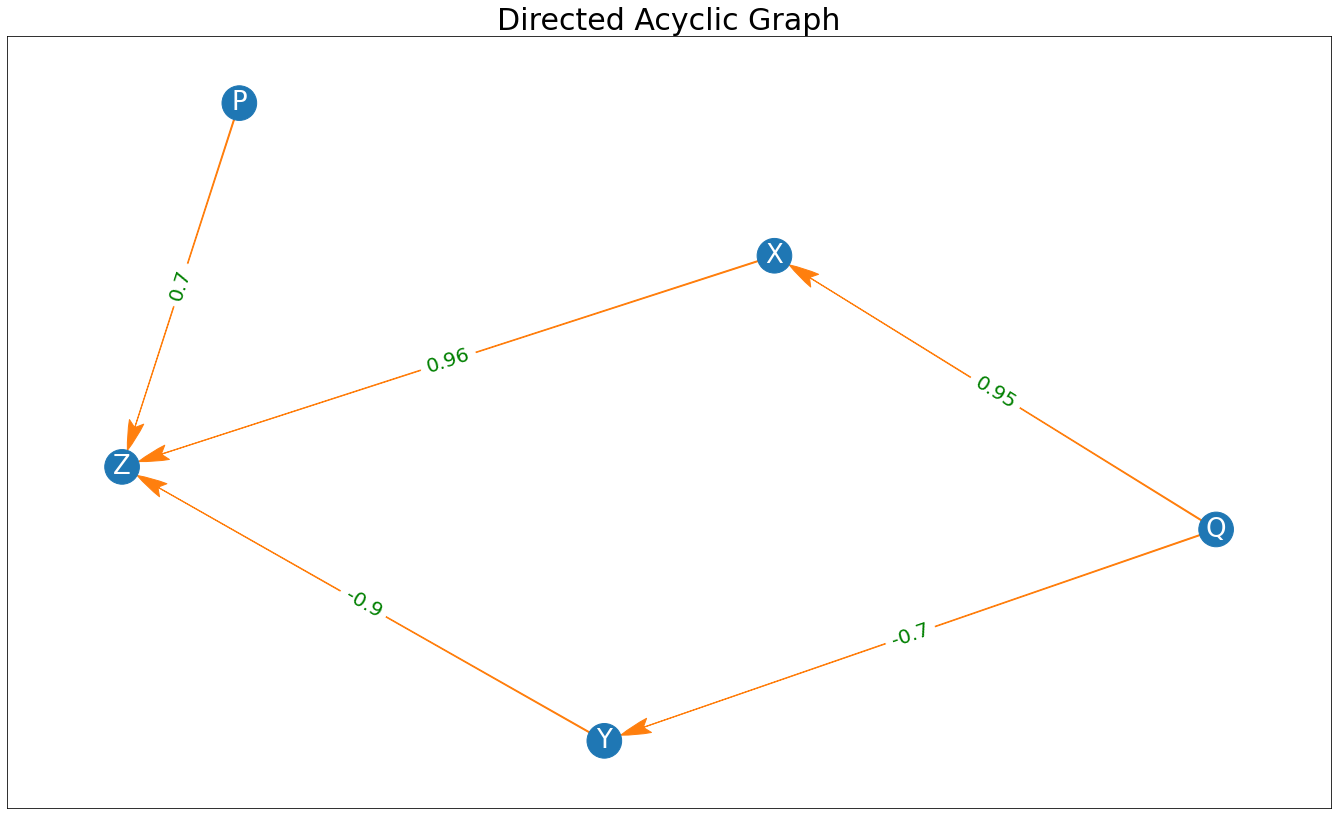

In [31]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        control = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)
        print(edge, keep_controls)
        # build pcorr matrix with nodes from the edge + controls
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr().round(2)
        edge_labels[edge] = str(pcorr.loc[edge[1], edge[0]])
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                    pos,
                    node_color = color_map,
                    node_size = 1200,
                    font_color = "white",
                    font_size = 26,
                    alpha = 1,
                    width = 1,
                    edge_color = "C1",
                    arrowstyle = ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width = .1"))
    
    nx.draw_networkx_edge_labels(graph,
                                pos,
                                edge_labels = edge_labels,
                                font_color = "green",
                                font_size = 20)
    
    plt.show()
graph_DAG(edges, df, title = "Directed Acyclic Graph")
